In [17]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/sale.csv")
df

,ad_cost,sale
0,3.7,42.5
1,2.0,35.0
2,3.0,39.5
3,2.0,36.5
4,3.5,47.5
5,4.8,44.0
6,4.5,49.0
7,4.5,48.0
8,3.8,42.0
9,5.0,56.0


In [9]:
x = df.ad_cost
y = df.sale
x_wconst = sm.add_constant(x) #Always need to put "x" in sm.something()
lr = sm.OLS(y, x_wconst).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                   sale   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     24.17
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           0.000608
Time:                        23:45:57   Log-Likelihood:                -31.561
No. Observations:                  12   AIC:                             67.12
Df Residuals:                      10   BIC:                             68.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.4655      4.170      6.107      0.0

C:\Users\khaop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [10]:
F_crit = stats.f.isf(0.05, dfn = 1, dfd = 12 - 2)
F_crit

np.float64(4.9646027437307145)

In [ ]:
b1 = sum((x - x.mean()) * (y - y.mean())) / sum((x - x.mean()) ** 2) #find b1
b0 = y.mean() - b1 * x.mean() #find b0
y_hat = b0 + b1 * x #calculate y_hat
s = np.sqrt(sum(y - y_hat) ** 2) / (12 - 2) #calculate to find S

In [ ]:
print("b1 is ", b1)
print("b0 is ", b0)
print("y_hat is ", y_hat)
print("s is ", s)

b1 is  5.194635488308116
b0 is  25.465474552957357
y_hat is  0     44.685626
1     35.854746
2     41.049381
3     35.854746
4     43.646699
5     50.399725
6     48.841334
7     48.841334
8     45.205089
9     51.438652
10    46.244017
11    51.438652
Name: ad_cost, dtype: float64
s is  2.842170943040401e-15


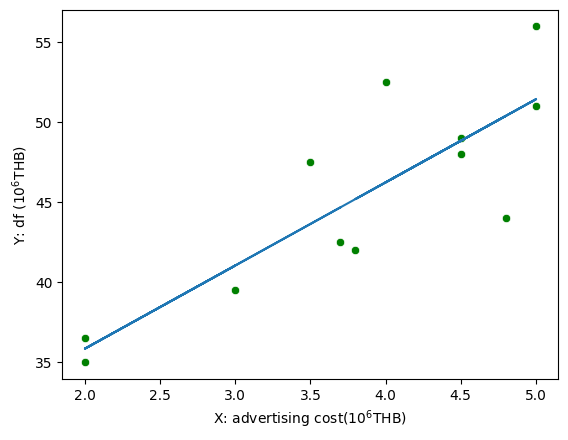

In [ ]:
#Plot the Graph
sns.scatterplot(data = df, x = 'ad_cost', y = 'sale', color = 'g')
plt.xlabel('X: advertising cost($10^6$THB)') #To specify X value
plt.ylabel('Y: df ($10^6$THB)') #To specify Y value
plt.plot(df.ad_cost, y_hat)